# Predict Angina Chest Pain Type Based on Blood Pressure, Age, and Maximum Heart Rate

## Introduction:

Recently, with the fast development in healthcare systems, the public has started to insert more attention towards healthcare, especially heart disease, the second major cause of death. Therefore, we decided to build a model related to one particular heart disease, Angina.

Angina is a heart disease that makes patients feel strong, squeezed chest pain. If the case is severe, hospitalization is required. Possible symptoms include dizziness, nausea, and/or shortness of breath. Furthermore, there are four types of angina:

**Typical angina** consists of 3 main criteria: 
* It is a substernal chest discomfort or pain.
* It is mainly caused from emotional stress or exertion.
* Symptoms can be relieved from nitroglycerine or rest (or both).

**Atypical angina** consists of 2 out of the 3 criteria found in a typical angina.

**Non-anginal** chest pain has very similar symptoms to typical angina, but with a shorter period and doesn’t satisfy any of the 3 criteria of classic chest pain.

**Asymptomatic chest pain** occurs when the patient shows no signs of common angina symptoms.

### Question:

Given measurements of a patient’s resting blood pressure, age, and maximum heart rate, what type of chest pain would the patient be experiencing?



### Dataset Used:

We will use "Heart Attack Analysis & Prediction Dataset" to answer the question.

https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset?select=heart.csv

We chose this dataset because it is very inclusive, containing a few hundred different cases. Moreover, it also examines many different variables, such as resting blood pressure, cholesterol, age, etc. Variety in cases can boost the accuracy and conclusiveness of our prediction model. 

## Preliminary exploratory data analysis:

#### Variables:
1. age - age of patient
2. sex - sex of patient
3. cp - type of chest pain:
    - 0 == asymptomatic
    - 1 = typical angina
    - 2 = atypical angina
    - 3 = non-anginal pain
4. trtbps - resting blood pressure (mm Hg) at time admitted to hospital
5. chol - serum cholestoral (mg/dl)
6. fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
7. restecg - resting electrocardiographic results
    - 0 = hypertrophy
    - 1 = normal
    - 2 = having ST-T wave abnormality
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina:
    - 1 = yes
    - 0 = no
10. oldpeak - ST depression caused by rest relative to exercise
11. slp - slope of peak exercise ST segment
    - 0 = downsloping
    - 1 = flat
    - 2 = upslopting
12. caa - # of flourosopy colored major vessels (0-3) 
13. thall:
    - 1 = fixed defect
    - 2 = normal
    - 3 = reversable defect
14. output - predicted attribute - diagnosis of heart disease (angiographic disease status):
    - 0 = < diameter narrowing
    - 1 = > 50% diameter narrowing)

In [29]:
# Running initial packages
library(tidyverse)
library(tidymodels)
library("ggplot2")
library("GGally")

options(repr.matrix.max.rows = 6)

In [30]:
# Load training and test data
url <- "https://raw.githubusercontent.com/AlexLuo602/group26v2/main/heart.csv"

download.file(url, destfile = "heart.csv")

heart_csv <- read_csv("heart.csv")
heart_csv

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trtbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalachh = col_double(),
  exng = col_double(),
  oldpeak = col_double(),
  slp = col_double(),
  caa = col_double(),
  thall = col_double(),
  output = col_double()
)



age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [31]:
# load seed for reproducibility
set.seed(1)

# split data into training and testing sets
select_heart_csv <- heart_csv %>%
    mutate(chest.pain.type = as_factor(cp)) %>%
    select(chest.pain.type, chol, trtbps, age, thalachh, oldpeak)

heart_split <- initial_split(select_heart_csv, prop = 0.75, strata = chest.pain.type)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

head(heart_train)
head(heart_test)

chest.pain.type,chol,trtbps,age,thalachh,oldpeak
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,233,145,63,150,2.3
1,204,130,41,172,1.4
1,236,120,56,178,0.8
0,192,140,57,148,0.4
1,294,140,56,153,1.3
1,263,120,44,173,0.0


chest.pain.type,chol,trtbps,age,thalachh,oldpeak
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,250,130,37,187,3.5
0,354,120,57,163,0.6
3,226,150,66,114,2.6
0,247,150,43,171,1.5
3,199,140,40,178,1.4
2,417,140,65,157,0.8


In [32]:
separate_class <- select_heart_csv %>% 
    filter(chest.pain.type %in% c(1, 2, 3))

convert_class <- separate_class %>% 
    mutate(chest.pain.type = 1)

select_heart_csv <- select_heart_csv %>% 
    filter(chest.pain.type == 0)

select_heart_csv <- rbind(select_heart_csv, convert_class)

select_heart_csv %>% 
    group_by(chest.pain.type) %>% 
    summarize(count = n())

heart_split <- initial_split(select_heart_csv, prop = 0.75, strata = chest.pain.type)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

head(heart_train)
head(heart_test)

`summarise()` ungrouping output (override with `.groups` argument)



chest.pain.type,count
<fct>,<int>
0,143
1,160


chest.pain.type,chol,trtbps,age,thalachh,oldpeak
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,192,140,57,148,0.4
0,239,140,54,160,1.2
0,247,150,43,171,1.5
0,234,135,59,161,0.5
0,226,140,42,178,0.0
0,208,104,45,148,3.0


chest.pain.type,chol,trtbps,age,thalachh,oldpeak
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,354,120,57,163,0.6
0,177,120,65,140,0.4
0,236,138,45,152,0.2
0,243,138,46,152,0.0
0,303,130,64,122,2.0
0,228,160,66,138,2.3


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



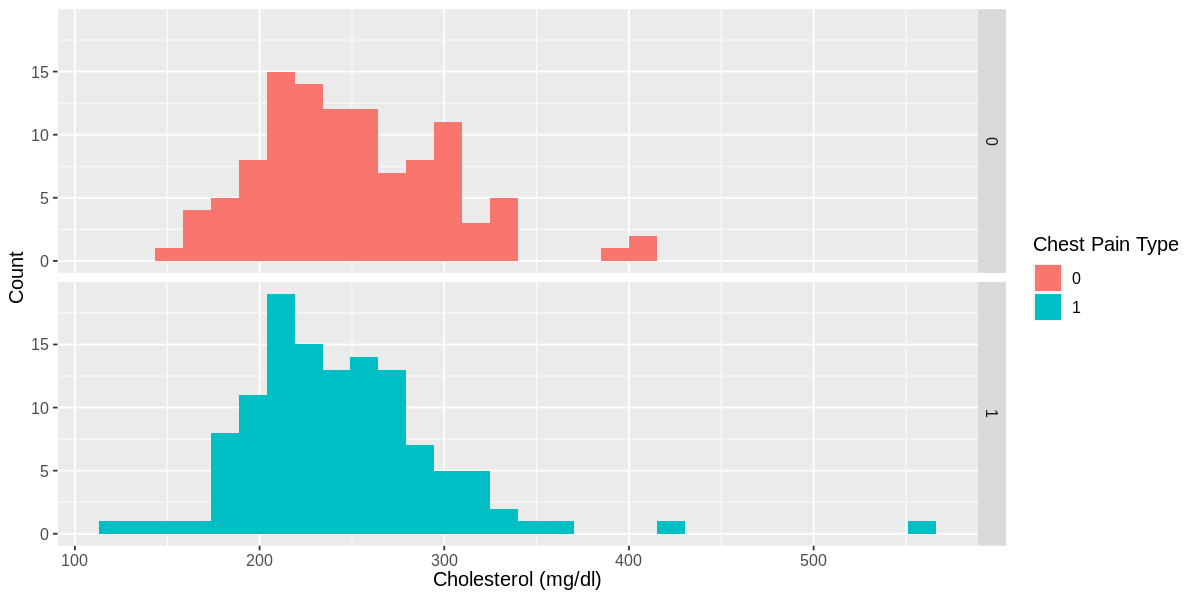

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



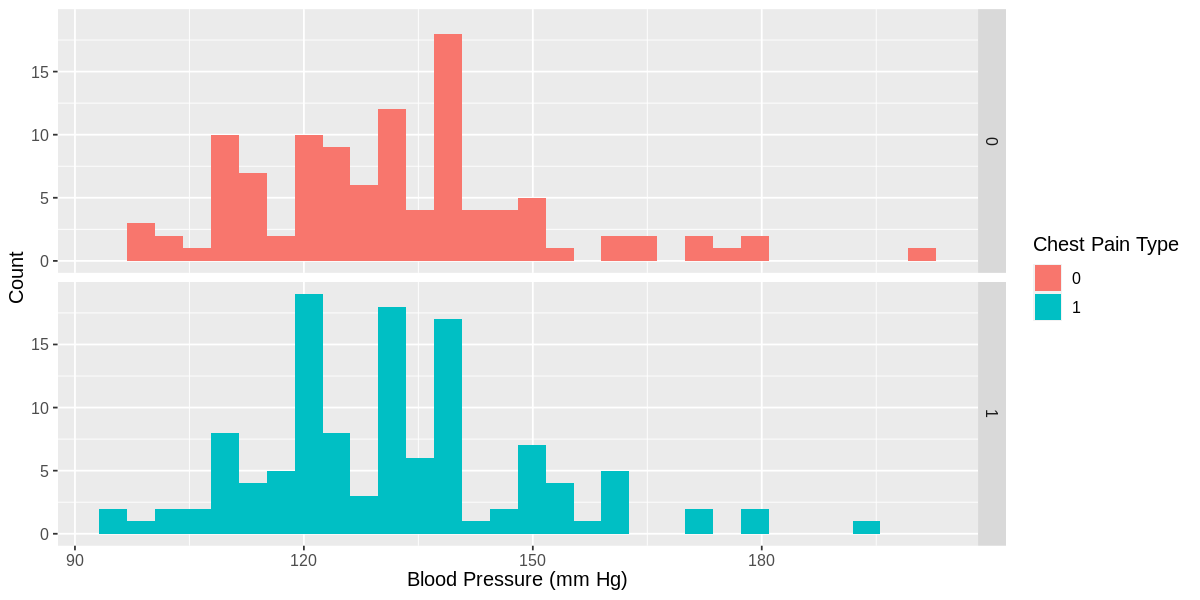

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



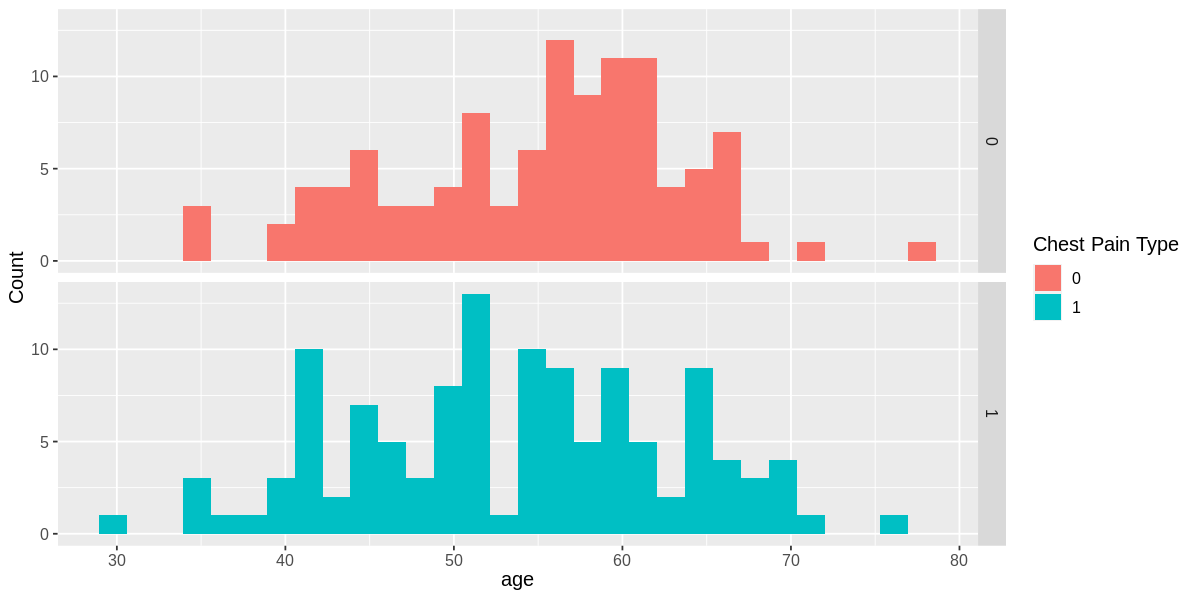

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



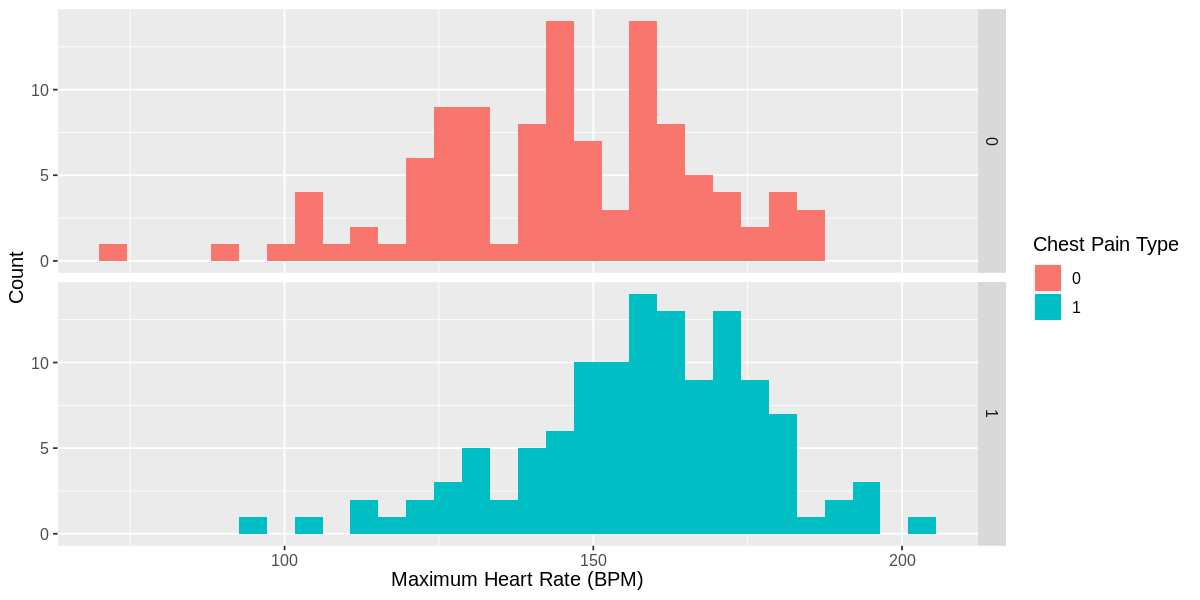

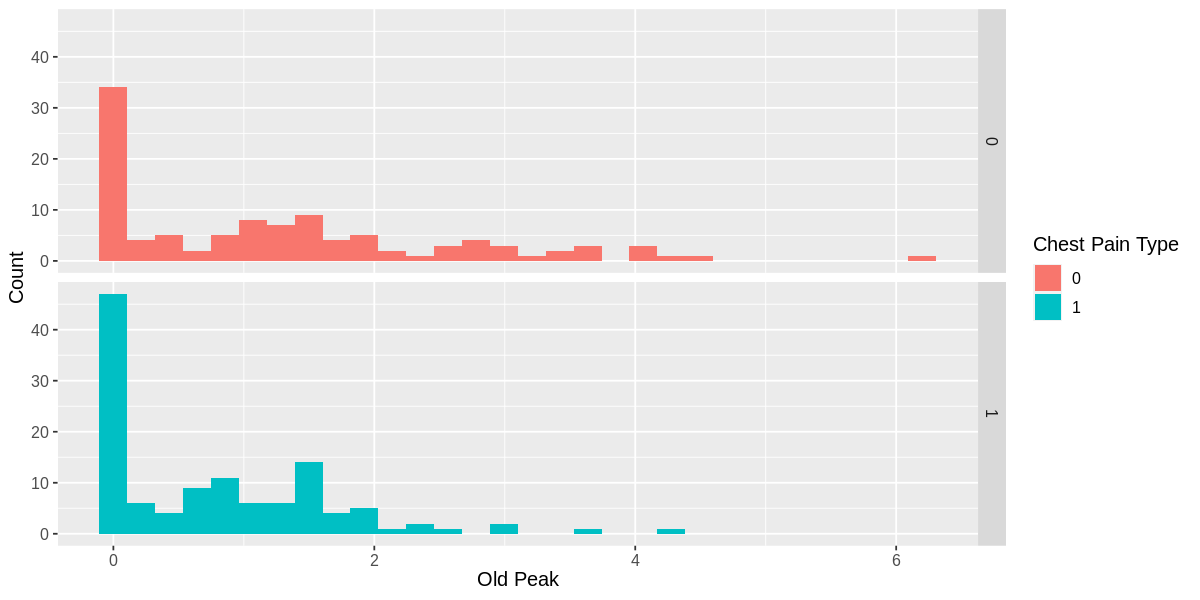

In [33]:
# viewing distribution of potential predictors

options(repr.plot.width = 10, repr.plot.height = 5)

heart_dist_chol <- ggplot(heart_train, 
                      aes(x = chol, 
                          fill = as_factor(chest.pain.type))) +
                          geom_histogram() +
                          facet_grid(rows = vars(chest.pain.type)) +
                          labs(x = "Cholesterol (mg/dl)", 
                               y = "Count", 
                               fill = "Chest Pain Type") +
                          theme(text = element_text(size = 12))

heart_dist_bps <- ggplot(heart_train, 
                      aes(x = trtbps, 
                          fill = as_factor(chest.pain.type))) +
                          geom_histogram() +
                          facet_grid(rows = vars(chest.pain.type)) +
                          labs(x = "Blood Pressure (mm Hg)", 
                               y = "Count", 
                               fill = "Chest Pain Type") +
                          theme(text = element_text(size = 12))

heart_dist_age <- ggplot(heart_train, 
                      aes(x = age, 
                          fill = as_factor(chest.pain.type))) +
                          geom_histogram() +
                          facet_grid(rows = vars(chest.pain.type)) +
                          labs(x = "age", 
                               y = "Count", 
                               fill = "Chest Pain Type") +
                          theme(text = element_text(size = 12))

heart_dist_max_heart_rate <- ggplot(heart_train, 
                      aes(x = thalachh, 
                          fill = as_factor(chest.pain.type))) +
                          geom_histogram() +
                          facet_grid(rows = vars(chest.pain.type)) +
                          labs(x = "Maximum Heart Rate (BPM)", 
                               y = "Count", 
                               fill = "Chest Pain Type") +
                          theme(text = element_text(size = 12))

heart_dist_oldpeak <- ggplot(heart_train, 
                      aes(x = oldpeak, 
                          fill = as_factor(chest.pain.type))) +
                          geom_histogram() +
                          facet_grid(rows = vars(chest.pain.type)) +
                          labs(x = "Old Peak", 
                               y = "Count", 
                               fill = "Chest Pain Type") +
                          theme(text = element_text(size = 12))

heart_dist_chol
heart_dist_bps
heart_dist_age
heart_dist_max_heart_rate
heart_dist_oldpeak

Cholesterol and old peak seem to have the same distribution between chest pain types, so they wouldn't be strong predictors.

The other 3 variables have better distributions, so we can try using them as predictors.

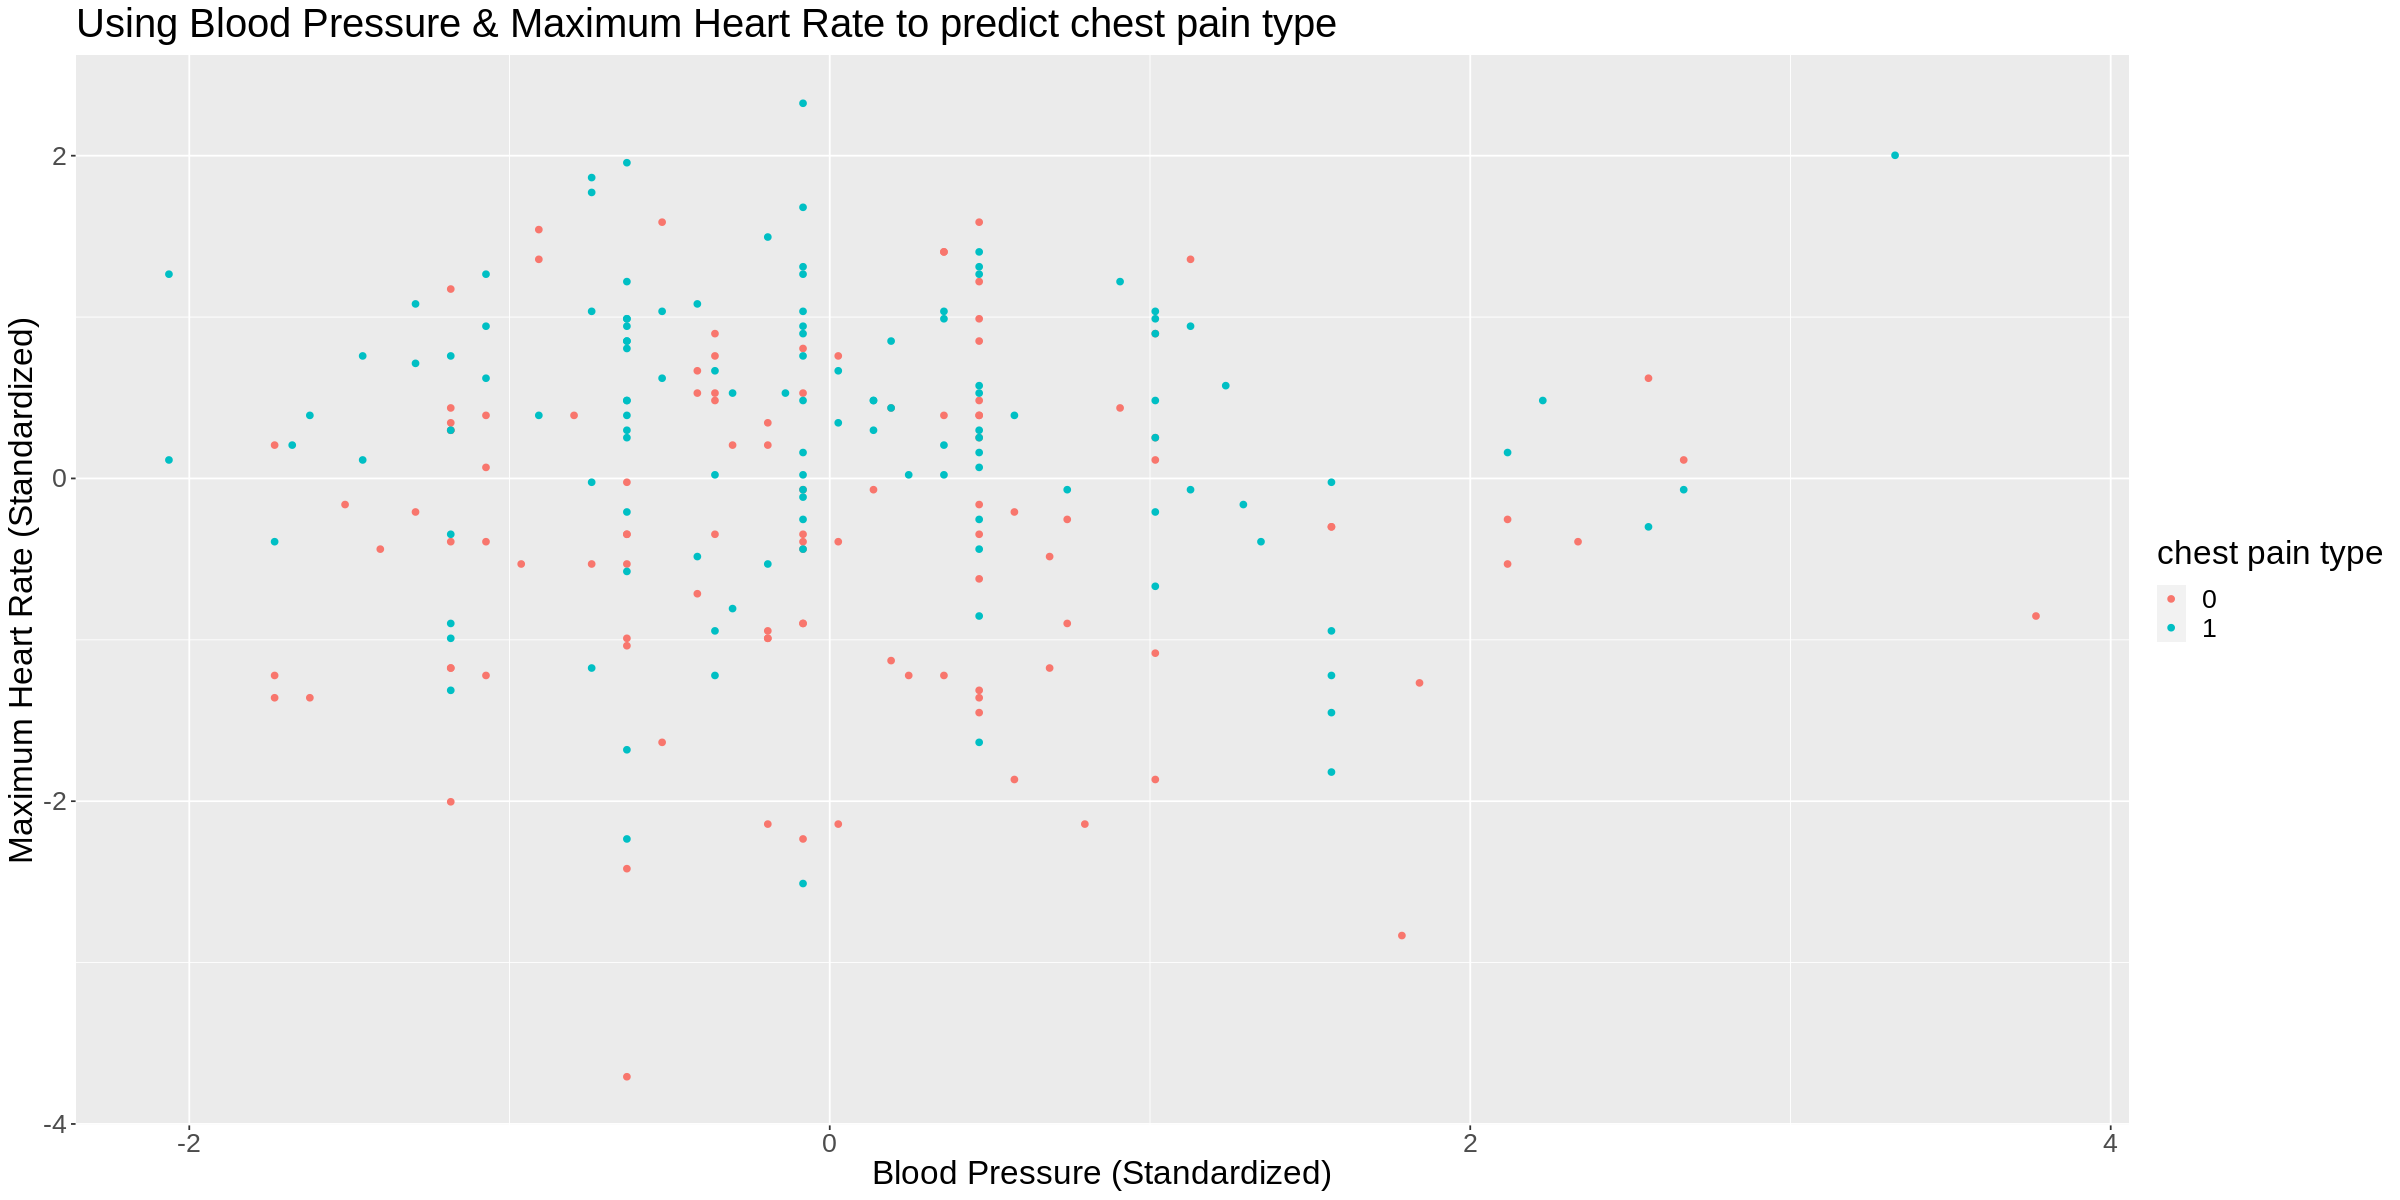

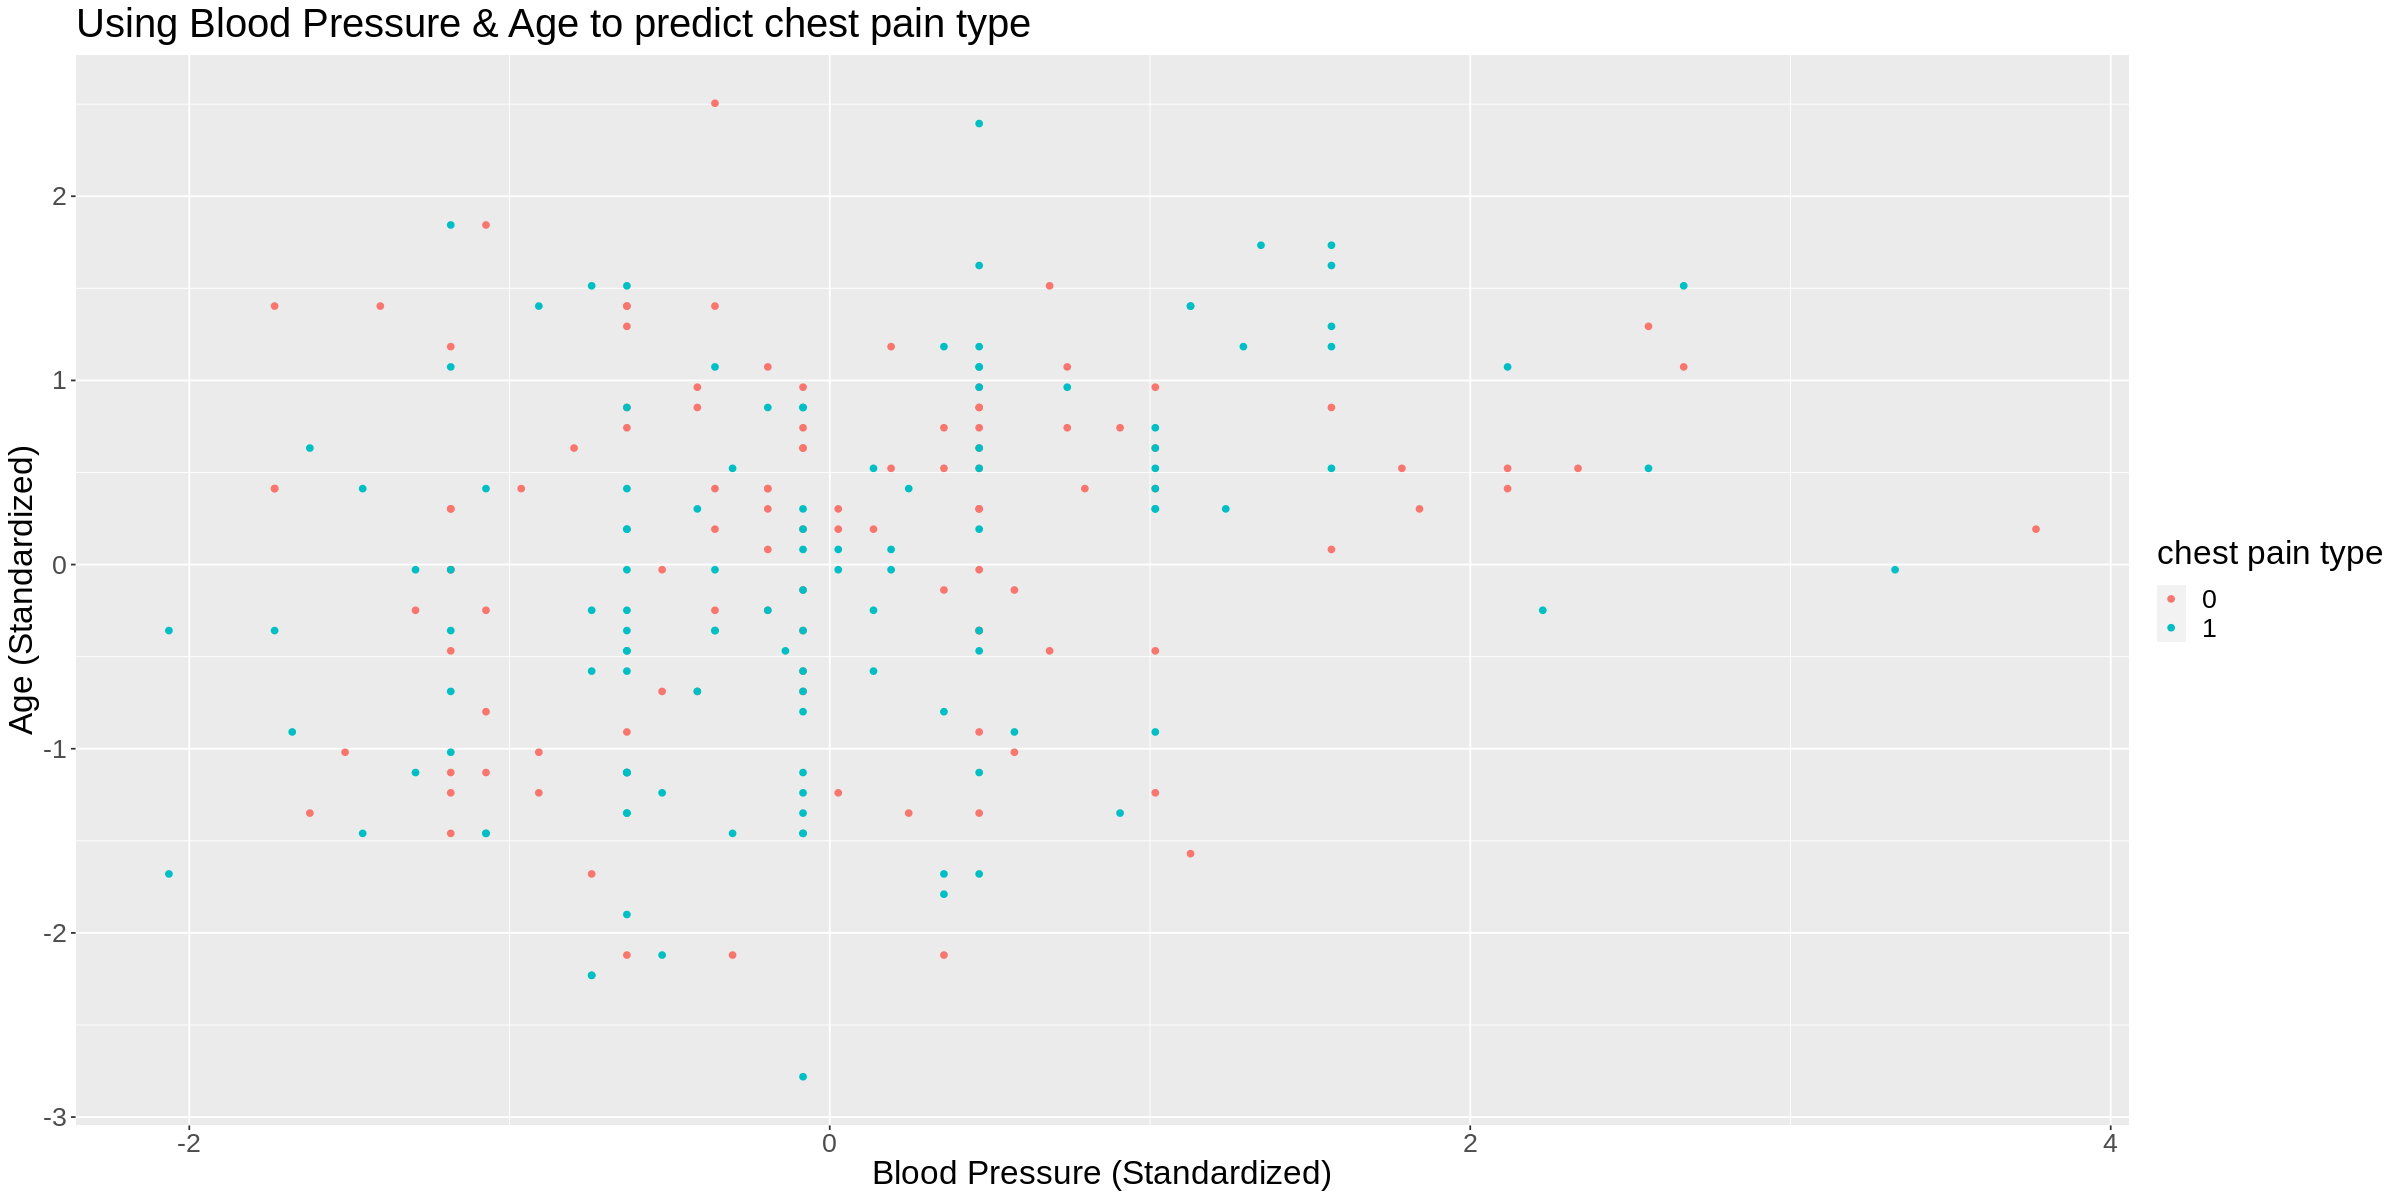

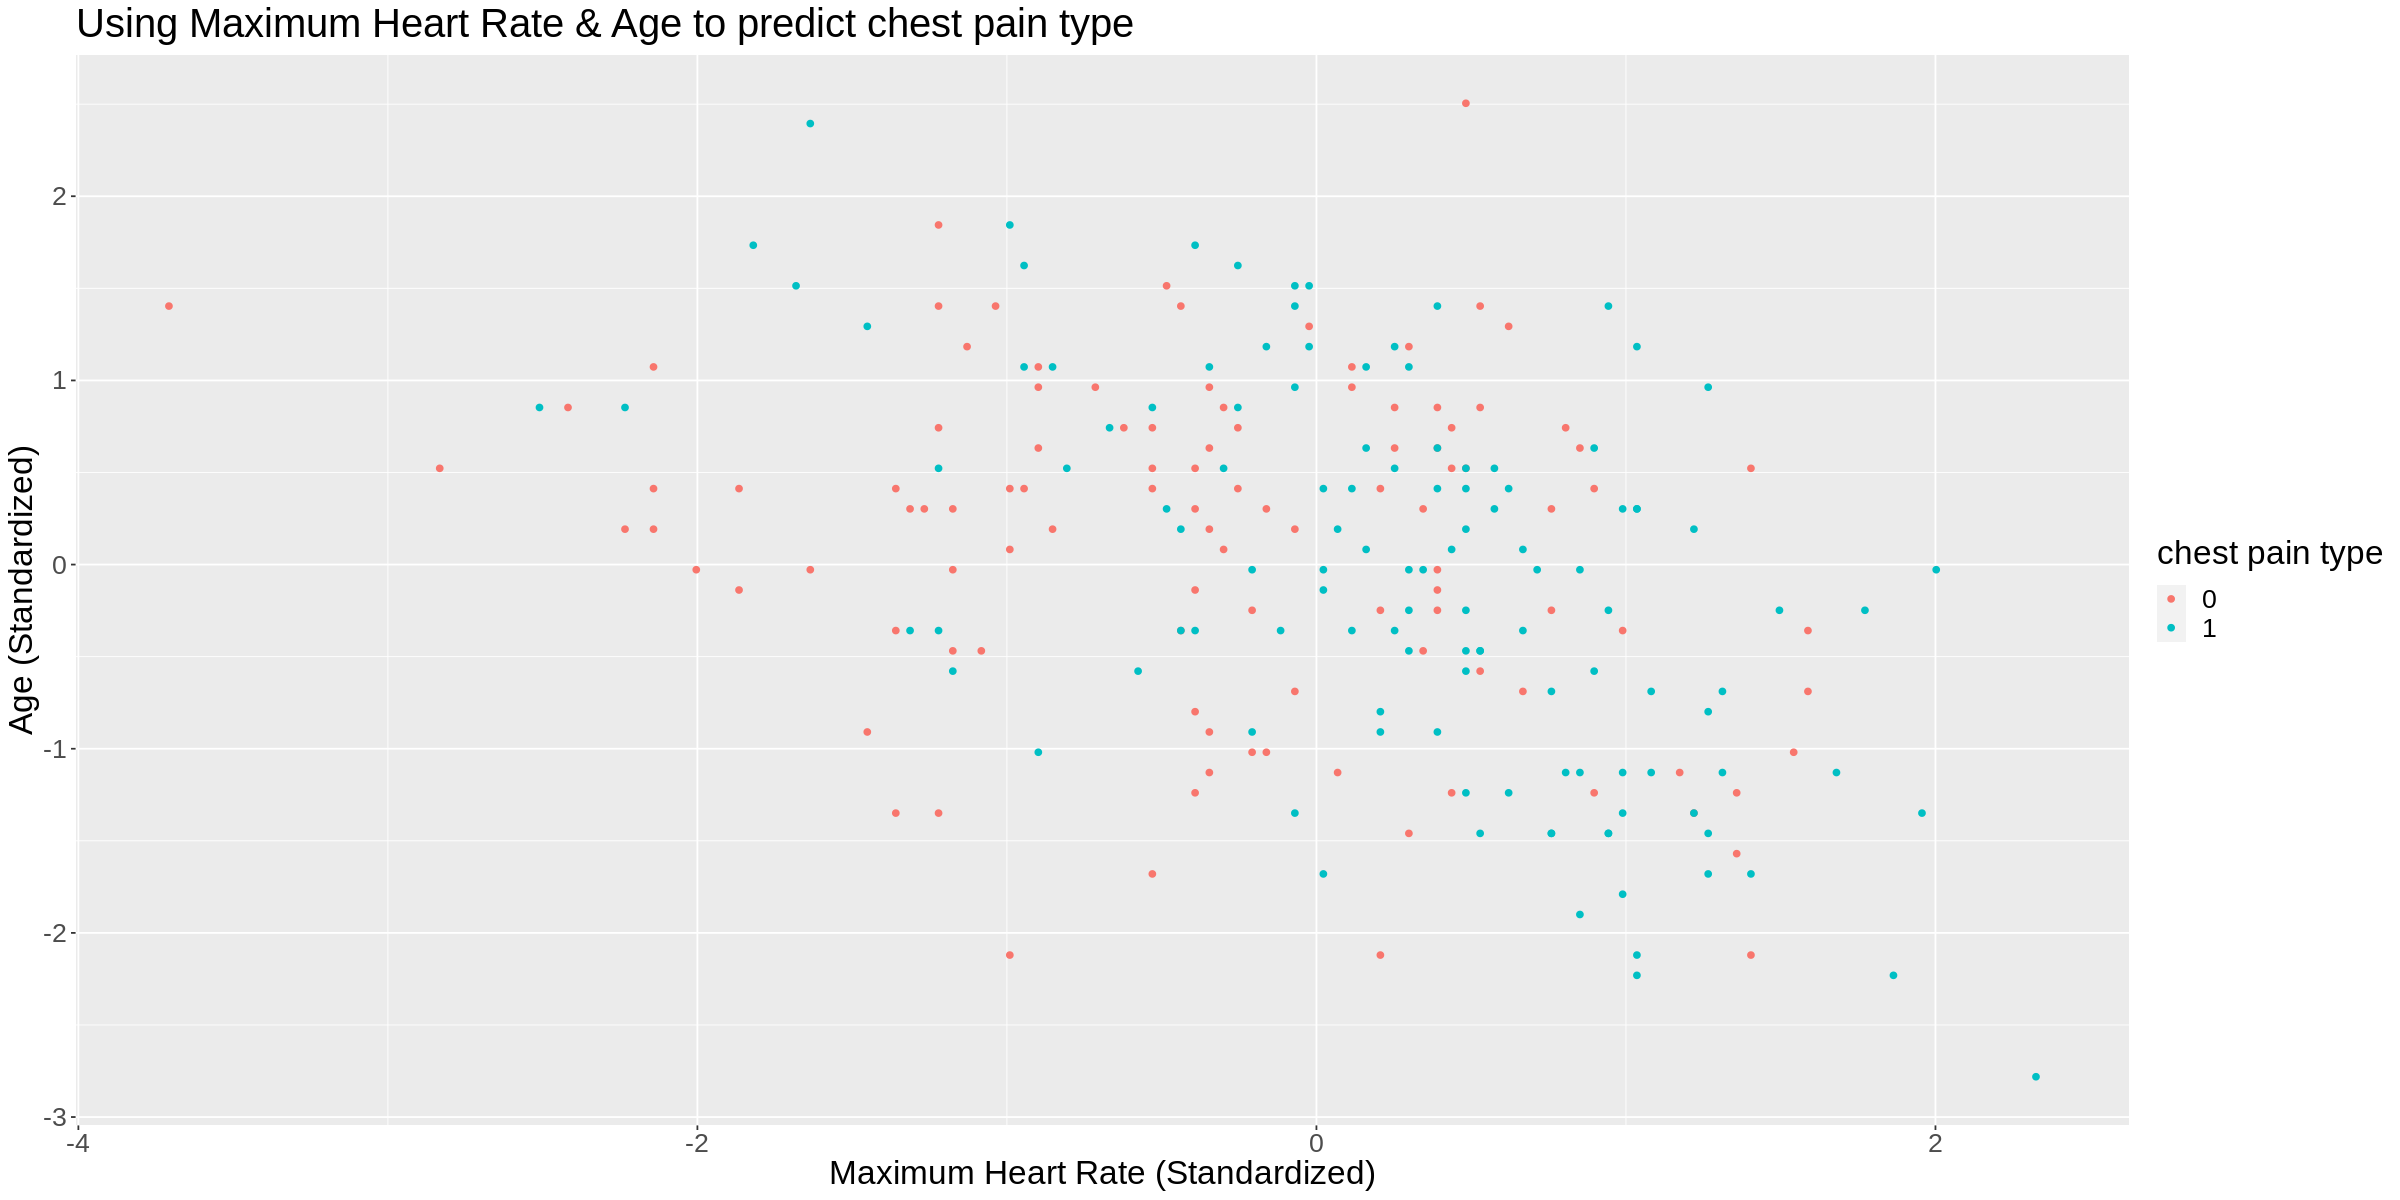

In [34]:
# Created a plot with the standardized predictors in the axes and colored using chest pain type.

options(repr.plot.width = 20, repr.plot.height = 10)

heart_recipe <- recipe(chest.pain.type ~ ., data = heart_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors()) %>%
    prep() %>%
    bake(heart_train)

plot_trtbps_thalachh <- heart_recipe %>%
ggplot(aes(x=trtbps, y= thalachh, colour= chest.pain.type))+
    geom_point()+
    labs(x= "Blood Pressure (Standardized)", y= "Maximum Heart Rate (Standardized)", 
         colour="chest pain type")+
    ggtitle("Using Blood Pressure & Maximum Heart Rate to predict chest pain type")+
    theme(text=element_text(size=20))



plot_trtbps_age <- heart_recipe %>%
ggplot(aes(x=trtbps, y= age, colour= chest.pain.type))+
    geom_point()+
    labs(x= "Blood Pressure (Standardized)", y= "Age (Standardized)", 
         colour="chest pain type")+
    ggtitle("Using Blood Pressure & Age to predict chest pain type")+
    theme(text=element_text(size=20))

plot_thalachh_age <- heart_recipe %>%
ggplot(aes(x=thalachh, y= age, colour= chest.pain.type))+
    geom_point()+
    labs(x= "Maximum Heart Rate (Standardized)", y= "Age (Standardized)", 
         colour="chest pain type")+
    ggtitle("Using Maximum Heart Rate & Age to predict chest pain type")+
    theme(text=element_text(size=20))

plot_trtbps_thalachh

plot_trtbps_age

plot_thalachh_age

# Since this model is not 100% accurate, if the symptoms continue to get worse, then a professional diagnosis at hospital is required. 
# This is only an unprofessional, first stepped analysis, therefore cannot be treated as final report.

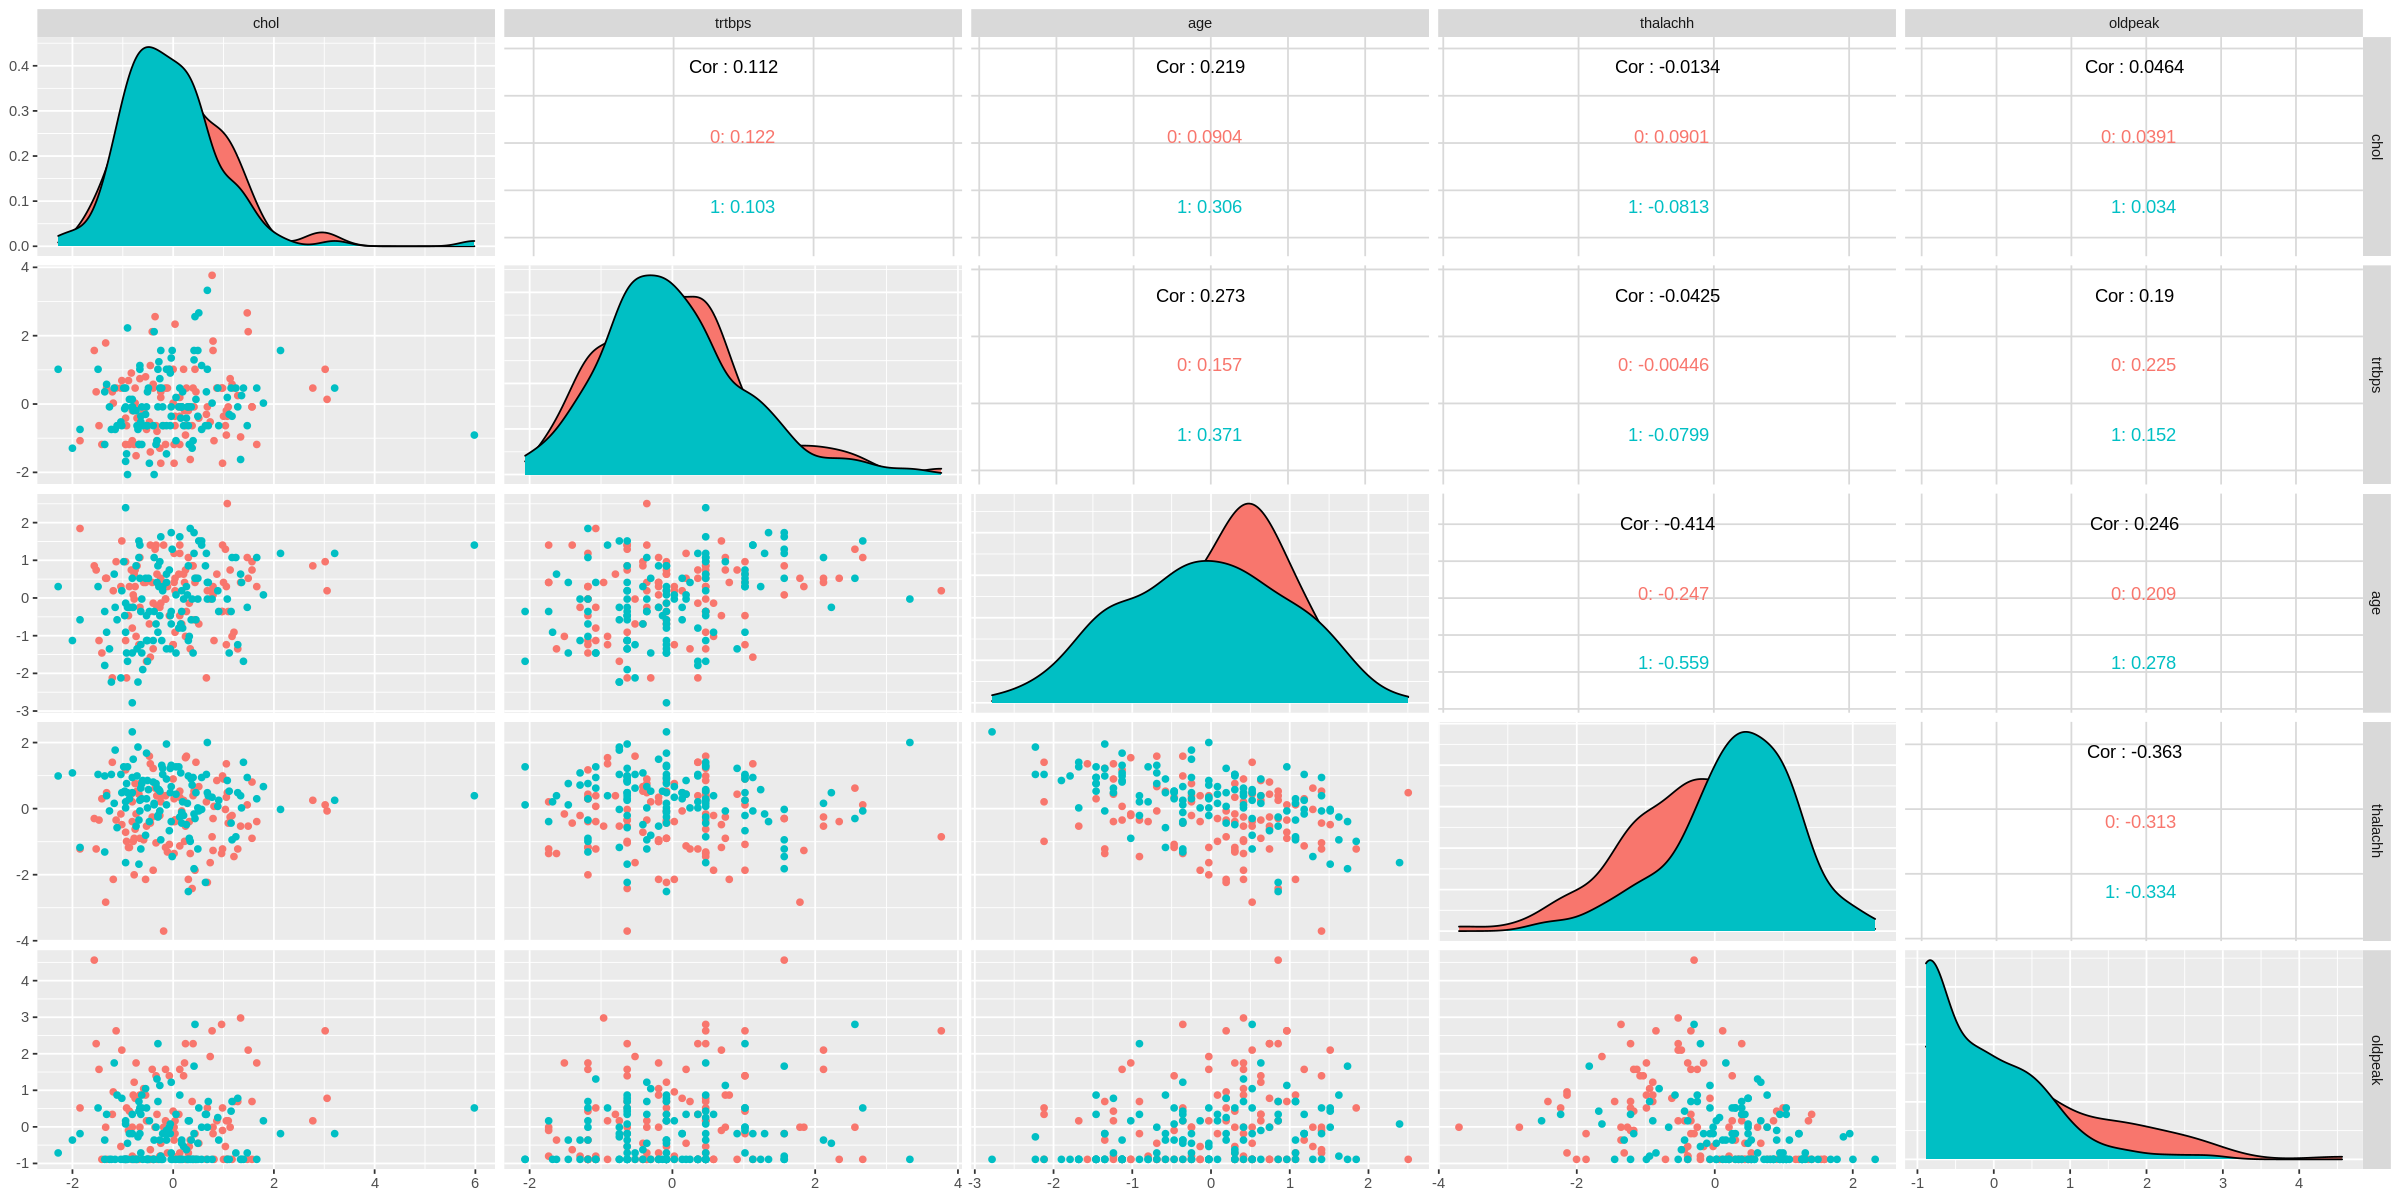

In [35]:
heart_plots <- ggpairs(heart_recipe, columns = 1:5, ggplot2::aes(colour=chest.pain.type))

heart_plots

# heart_recipe

These distributions seem acceptable for the three plots, although they could be better. The green points (type 1) seemed to be clustered the most tightly, while the other three types were loosely scattered across the graph. This trend happens in each plot, meaning that our predictors have roughly the same strength.

Therefore, we will be using these three variables as predictors, as there isn't an inferior one among them.

In [36]:
# Summarize the number of observations in each class
heart_observations <- heart_train %>%
    group_by(chest.pain.type) %>% 
    summarize(count = n())

heart_observations

# There is an uneven distribution.

`summarise()` ungrouping output (override with `.groups` argument)



chest.pain.type,count
<fct>,<int>
0,108
1,120


table 1: count of classes

In [37]:
# Summarize means of each predictor
heart_means <- heart_train %>% 
    summarize(age_mean = mean(age), trtbps_mean = mean(trtbps), thalachh_mean = mean(thalachh))
heart_means

age_mean,trtbps_mean,thalachh_mean
<dbl>,<dbl>,<dbl>
54.25439,131.5175,151.5132


In [38]:
# There doesn't appear to be any na values in this data set
na_count <- heart_train %>%
  map_df(~sum(is.na(.x)))

na_count

chest.pain.type,chol,trtbps,age,thalachh,oldpeak
<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0


## Method & Results

Based on the analysis above, we will be using blood pressure, maximum heart rate, and age as our 3 predictors.

We will use **classification** as our method, with chest pain type as our target variable and the predictors mentioned above.

Since there is an uneven distribution between chest pain types, we need to balance the predictors.

Split our data into 75% training and 25% testing using the initial split function.

Use cross validation to find optimal K by using tuning and vfold_cv on our training set.

Finally, use our model to predict the classes for our testing set, and use metrics to determine accuracy of our model. 

We will visualize the results using a confusion matrix for our classifier and plotting it.


## Code:

Although balancing before cross-validation has some pitfalls, like data leakage, the classes are too imbalanced to not up_sample.

In [56]:
# Balance class using step_upsample

heart_train <- select(heart_train, chest.pain.type, age, oldpeak, thalachh)

# heart_recipe <- recipe(chest.pain.type ~ ., data = heart_train) %>% 
#     themis::step_upsample(chest.pain.type, over_ratio = 1, skip = FALSE) %>% 
#     prep() %>% 
#     bake(heart_train)

# recipe_data_set <- heart_recipe %>% 
#     group_by(chest.pain.type) %>% 
#     summarize(n = n())

# recipe_data_set

# dummy_recipe <- recipe(chest.pain.type ~ ., data = heart_recipe)

dummy_recipe <- recipe(chest.pain.type ~ ., data = heart_train)

dummy_recipe %>% 
    prep() %>% 
    bake(heart_train)

age,oldpeak,thalachh,chest.pain.type
<dbl>,<dbl>,<dbl>,<fct>
57,0.4,148,0
54,1.2,160,0
43,1.5,171,0
⋮,⋮,⋮,⋮
67,0.8,150,1
45,1.2,132,1
57,0.0,174,1


In [40]:
# Perform cross validation with 5 folds

heart_vfold <- vfold_cv(heart_train, v = 5, strata = chest.pain.type)

heart_tune <- nearest_neighbor(weight = "rectangular", neighbors = tune()) %>% 
    set_engine("kknn") %>% 
    set_mode("classification")

Try a sequence of 50 neighbors

In [41]:
gridvals = tibble(neighbors = seq(from = 1, to = 50))

vfold_results <- workflow() %>% 
    add_recipe(dummy_recipe) %>% 
    add_model(heart_tune) %>% 
    tune_grid(resamples = heart_vfold, grid = gridvals) %>% 
    collect_metrics()

vfold_results



! Fold1: internal: No observations were detected in `truth` for level(s): '2', '3...

! Fold2: internal: No observations were detected in `truth` for level(s): '2', '3...

! Fold3: internal: No observations were detected in `truth` for level(s): '2', '3...

! Fold4: internal: No observations were detected in `truth` for level(s): '2', '3...

! Fold5: internal: No observations were detected in `truth` for level(s): '2', '3...



neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.4958454,5,0.04332302,Model01
1,roc_auc,hand_till,0.4938853,5,0.04307021,Model01
2,accuracy,multiclass,0.4958454,5,0.04332302,Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
49,roc_auc,hand_till,0.6673070,5,0.03854955,Model49
50,accuracy,multiclass,0.6314010,5,0.02188678,Model50
50,roc_auc,hand_till,0.6688222,5,0.03571099,Model50


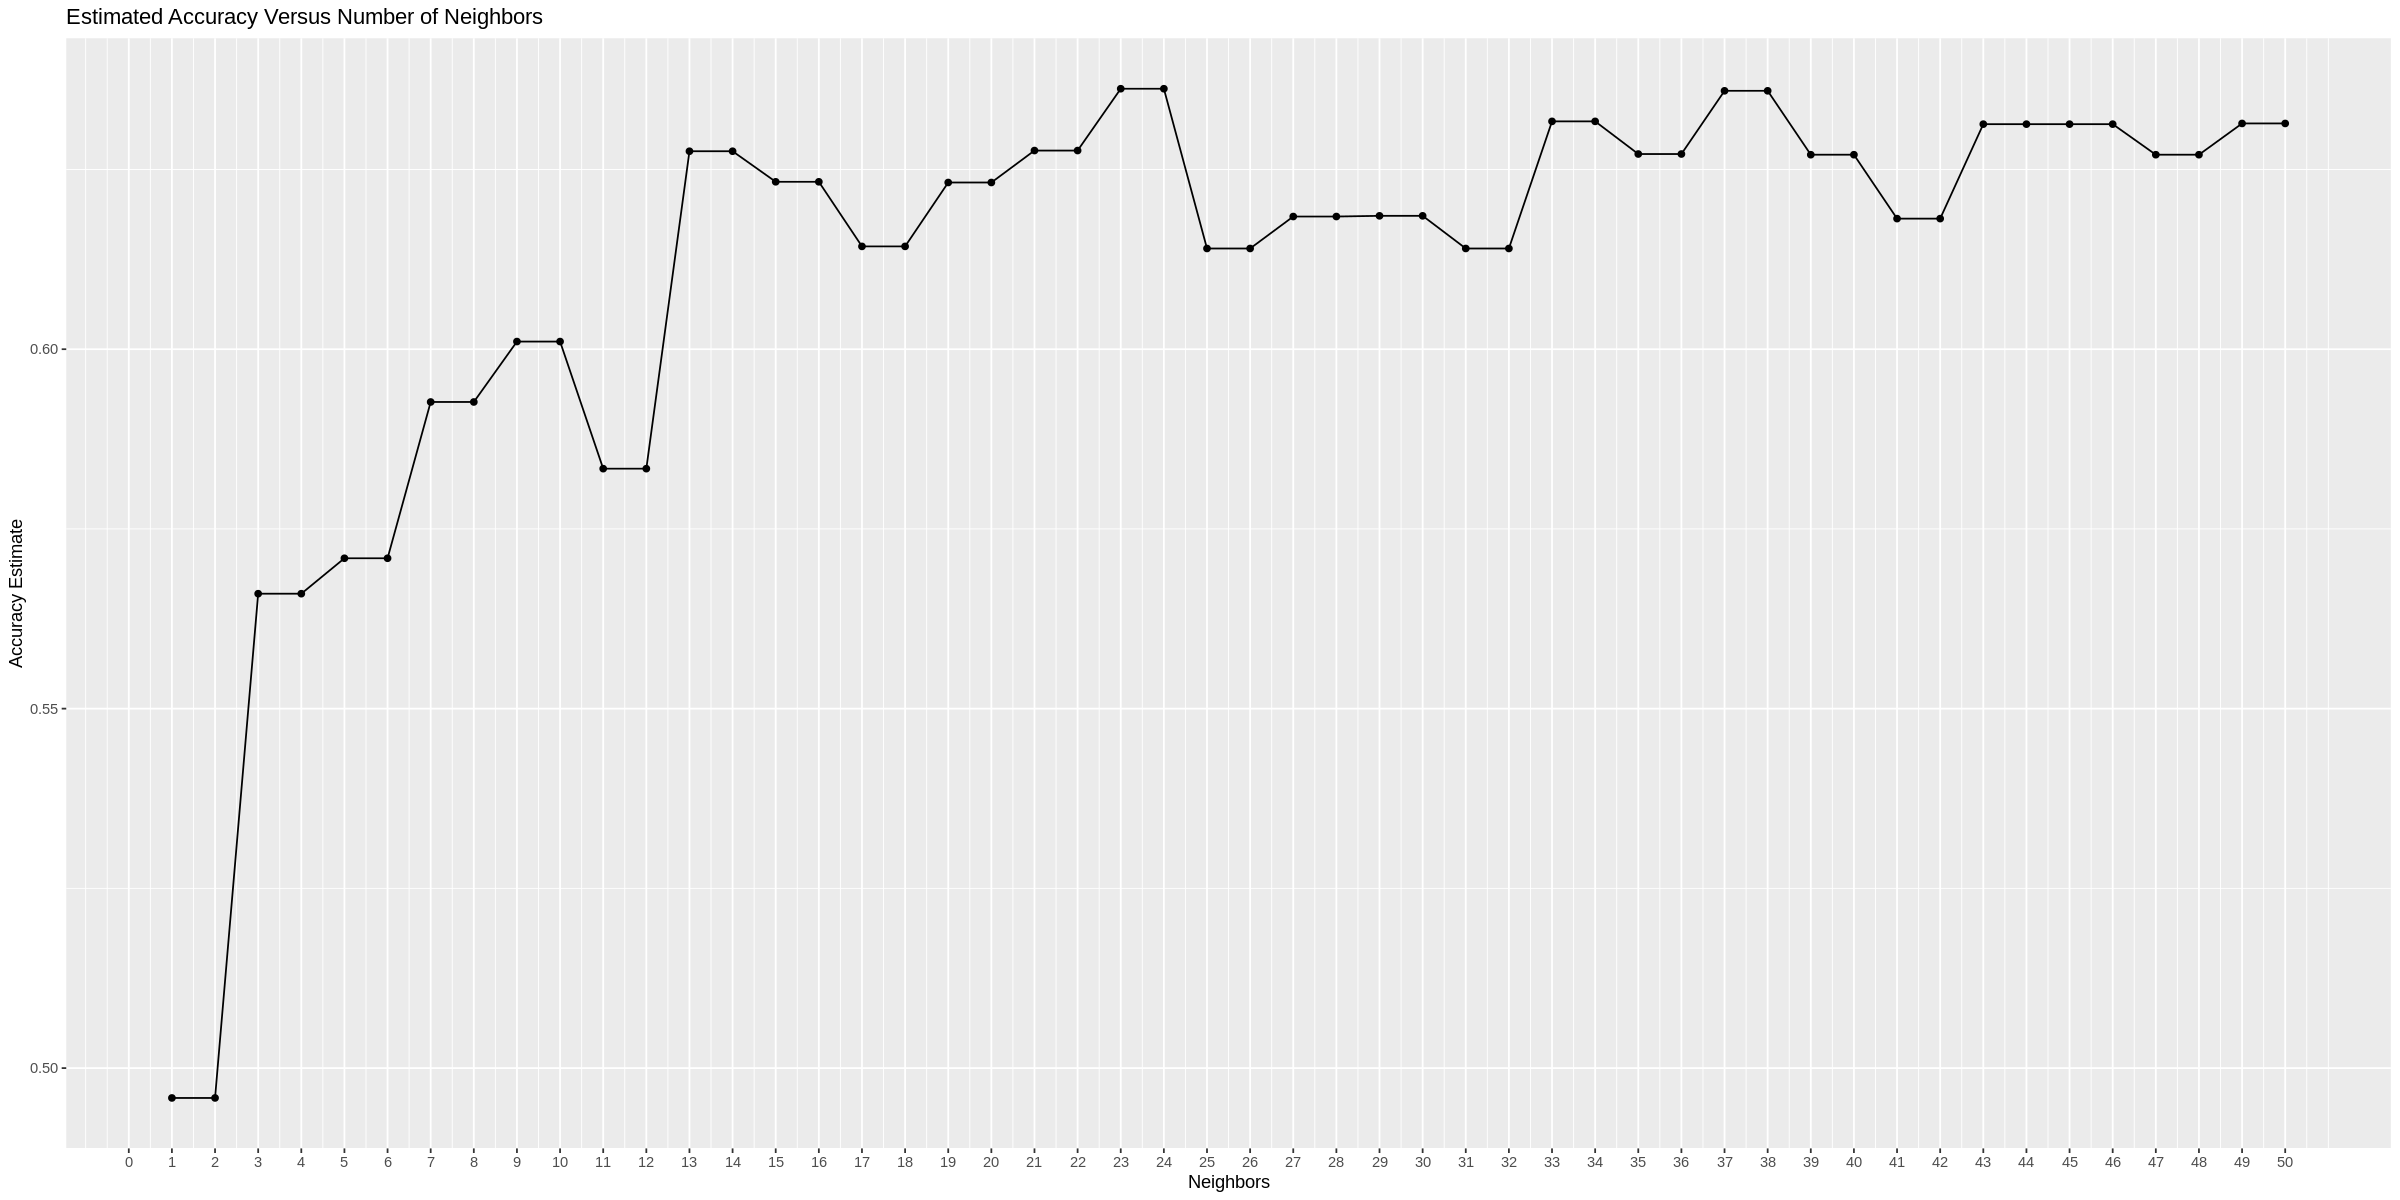

In [42]:
# plot 

accuracy <- vfold_results %>% 
    filter(.metric == "accuracy")

vfold_plot <- ggplot(accuracy, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    scale_x_continuous(breaks = seq(0, 50, by = 1)) +
    ggtitle("Estimated Accuracy Versus Number of Neighbors")

vfold_plot

Choose k = 44, as that gave the highest accuracy, and nearby k values don't differ by too much.

In [54]:
heart_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 44) %>% 
    set_engine("kknn") %>% 
    set_mode("classification")

heart_fit <- workflow() %>% 
    add_recipe(dummy_recipe) %>% 
    add_model(heart_spec) %>% 
    fit(data = heart_train)
heart_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~44, kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.3859649
Best kernel: rectangular
Best k: 44

In [55]:
heart_test_predictions <- predict(heart_fit, heart_test) %>% 
    bind_cols(heart_test)

heart_prediction_accuracy <- heart_test_predictions %>% 
    metrics(truth = chest.pain.type, estimate = .pred_class)

heart_prediction_accuracy

heart_test_predictions

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.8000000
kap,multiclass,0.5945946


.pred_class,chest.pain.type,chol,trtbps,age,thalachh,oldpeak
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,354,120,57,163,0.6
1,0,177,120,65,140,0.4
1,0,236,138,45,152,0.2
⋮,⋮,⋮,⋮,⋮,⋮,⋮
1,1,243,108,47,152,0.0
1,1,231,120,38,182,3.8
0,1,234,134,61,145,2.6


In [45]:
heart_mat <- heart_test_predictions %>% 
    conf_mat(truth = chest.pain.type, estimate = .pred_class)

heart_mat

          Truth
Prediction  0  1  2  3
         0 25  5  0  0
         1 10 35  0  0
         2  0  0  0  0
         3  0  0  0  0

## Visualization of Results

## Discussion:

**Findings**



**Expectations Versus Results**


**Potential Impacts**

Although official diagnosis should still be performed by a doctor, patients with mild chest pain can self-diagnose the type of chest pain they are experiencing and perform self-treatment.


**Future Questions**

How would adding more predictors change the accuracy of our model?

Would our accuracy improve if we had more observations in our training set?


## Include References!!!